In [1]:
import cv2
import numpy as np

def segment_text_lines(image_path):
    # Read the image
    original_image = cv2.imread(image_path)

    # Convert the image to grayscale
    img_bw = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.blur(img_bw, (3, 3))
    # Apply adaptive thresholding
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Calculate horizontal projection
    projection = np.sum(binary_image, axis=1)

    # Define a threshold to identify gaps between lines
    threshold = 0.2 * np.max(projection)

    # Find the line positions based on the projection
    lines = np.where(projection > threshold)[0]

    # Create a copy of the original image for visualization purposes
    result_image = original_image.copy()

    # Draw rectangles around each text line
    for i in range(0, len(lines) - 1, 2):
        start_line = lines[i]
        end_line = lines[i + 1]
        cv2.rectangle(result_image, (0, start_line), (result_image.shape[1], end_line), (0, 255, 0), 2)

    # Display the result
    cv2.imshow('Text Line Segmentation', result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = 'C:\\Users\\shubh\\OneDrive\\Desktop\\Padilla - Nobleza virtuosa_testExtract-10.png'
segment_text_lines(image_path)


In [2]:
import cv2
import numpy as np

def segment_text_lines(image):
    # Convert the image to grayscale
    #gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_bw = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.blur(img_bw, (3, 3))
    # Apply adaptive thresholding
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Calculate horizontal projection
    projection = np.sum(binary_image, axis=1)

    # Define a threshold to identify gaps between lines
    threshold = 0.2 * np.max(projection)

    # Find the line positions based on the projection
    lines = np.where(projection > threshold)[0]

    # Create a list to store the line regions
    line_regions = []

    # Extract line regions
    for i in range(0, len(lines) - 1, 2):
        start_line = lines[i]
        end_line = lines[i + 1]
        line_regions.append((0, start_line, image.shape[1], end_line))

    return line_regions

In [3]:
def draw_rectangles(image, regions):
    # Create a copy of the original image for visualization purposes
    result_image = image.copy()

    # Draw rectangles around each text line
    for region in regions:
        cv2.rectangle(result_image, (region[0], region[1]), (region[2], region[3]), (0, 255, 0), 2)

    return result_image

# Example usage
#image_path = 'path/to/your/book_page_image.jpg'
original_image = cv2.imread(image_path)

# Segment text lines
line_regions = segment_text_lines(original_image)

# Draw rectangles on the detected text lines
result_image_with_rectangles = draw_rectangles(original_image, line_regions)

# Display the result
cv2.imshow('Text Line Segmentation', result_image_with_rectangles)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np

In [5]:
def display_segmented_lines(image, line_regions):
    # Create a copy of the original image for visualization purposes
    result_image = image.copy()

    # Draw rectangles around each text line
    for region in line_regions:
        cv2.rectangle(result_image, (region[0], region[1]), (region[2], region[3]), (0, 255, 0), 2)

    # Display the result
    cv2.imshow('Text Line Segmentation', result_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
# Example usage
image_path = 'C:\\Users\\shubh\\OneDrive\\Desktop\\Padilla - Nobleza virtuosa_testExtract-10.png'
original_image = cv2.imread(image_path)

# Segment text lines
line_regions = segment_text_lines(original_image)

# Display the result
display_segmented_lines(original_image, line_regions)

In [5]:
import cv2

def segment_text_lines(image):
    # Replace this placeholder with your actual text line segmentation code
    # You might use techniques like OCR or image processing to detect text lines
    # For example, you could use the cv2.Canny edge detection as a placeholder
    edges = cv2.Canny(image, 50, 150)
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract bounding box coordinates for each contour
    line_regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        line_regions.append((x, y, x + w, y + h))
    
    return line_regions

def draw_rectangles(image, regions):
    # Create a copy of the original image for visualization purposes
    result_image = image.copy()

    # Draw rectangles around each text line
    for region in regions:
        cv2.rectangle(result_image, (region[0], region[1]), (region[2], region[3]), (0, 255, 0), 2)

    return result_image

# Example usage
image_path = "C:\\Users\\shubh\\OneDrive\\Desktop\\Padilla - Nobleza virtuosa_testExtract-02.png"
original_image = cv2.imread(image_path)

# Segment text lines
line_regions = segment_text_lines(original_image)

# Draw rectangles on the detected text lines
result_image_with_rectangles = draw_rectangles(original_image, line_regions)

# Display the result
cv2.imshow('Text Line Segmentation', result_image_with_rectangles)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
import cv2
import numpy as np

def segment_text_lines(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and aid in contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred, 50, 150)

    # Dilate the edges to close gaps in between object edges
    dilated = cv2.dilate(edges, None, iterations=2)

    # Find contours in the dilated image
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours that may not represent text lines
    min_contour_width = 100
    min_contour_height = 10
    line_regions = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Filter out small contours
        if w > min_contour_width and h > min_contour_height:
            line_regions.append((x, y, x + w, y + h))

    # Sort the line regions based on the y-coordinate to group lines vertically
    line_regions.sort(key=lambda x: x[1])

    # Merge overlapping or nearby lines
    merged_line_regions = []
    current_line = line_regions[0]

    for next_line in line_regions[1:]:
        if next_line[1] - current_line[3] < 10:  # Adjust the threshold as needed
            # Merge overlapping lines
            current_line = (current_line[0], current_line[1], next_line[2], next_line[3])
        else:
            merged_line_regions.append(current_line)
            current_line = next_line

    merged_line_regions.append(current_line)

    return merged_line_regions

# Example usage
image_path = "C:\\Users\\shubh\\OneDrive\\Desktop\\Padilla - Nobleza virtuosa_testExtract-10.png"
original_image = cv2.imread(image_path)

# Segment text lines
line_regions = segment_text_lines(original_image)

# Draw rectangles on the detected text lines
result_image_with_rectangles = draw_rectangles(original_image, line_regions)

# Display the result
cv2.imshow('Text Line Segmentation', result_image_with_rectangles)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [6]:
import cv2
import numpy as np

def segment_text_lines(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and aid in contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred, 50, 150)

    # Dilate the edges to close gaps in between object edges
    dilated = cv2.dilate(edges, None, iterations=2)

    # Find contours in the dilated image
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours that may not represent text lines
    min_contour_width = 100
    min_contour_height = 10
    min_y_center_difference = 5  # Adjust this value as needed
    line_regions = []

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Filter out small contours
        if w > min_contour_width and h > min_contour_height:
            # Calculate the y-coordinate of the center of the bounding box
            y_center = y + h // 2

            # Check if there is a nearby line, if yes, merge them
            merged = False
            for line in line_regions:
                if abs(y_center - line[1]) < min_y_center_difference:
                    line[0] = min(line[0], x)
                    line[2] = max(line[2], x + w)
                    line[1] = min(line[1], y)
                    line[3] = max(line[3], y + h)
                    merged = True
                    break

            # If not merged, add it as a new line
            if not merged:
                line_regions.append([x, y, x + w, y + h])

    # Filter out lines that are not long and horizontal
    min_line_width = 300
    min_line_height = 10
    horizontal_line_regions = [line for line in line_regions if (line[2] - line[0] > min_line_width and line[3] - line[1] > min_line_height)]

    return horizontal_line_regions

# Example usage
image_path = "C:\\Users\\shubh\\OneDrive\\Desktop\\Padilla - Nobleza virtuosa_testExtract-02.png"
original_image = cv2.imread(image_path)

# Segment text lines
line_regions = segment_text_lines(original_image)

# Draw rectangles on the detected text lines
result_image_with_rectangles = draw_rectangles(original_image, line_regions)

# Display the result
cv2.imshow('Text Line Segmentation', result_image_with_rectangles)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

NEW>>>>>>>>>>>>>>>>


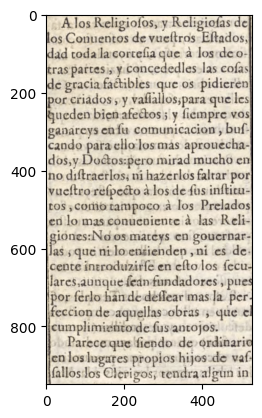

In [8]:
img = cv2.imread('C:\\Users\\shubh\\OneDrive\\Desktop\\Padilla - Nobleza virtuosa_testExtract-10.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img);

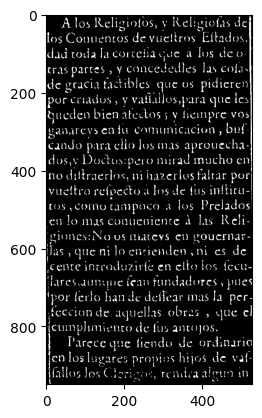

In [9]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,100,355,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);

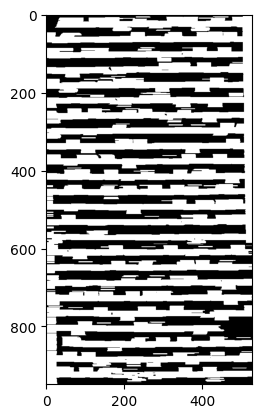

In [10]:
#dilation
kernel = np.ones((1,35), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

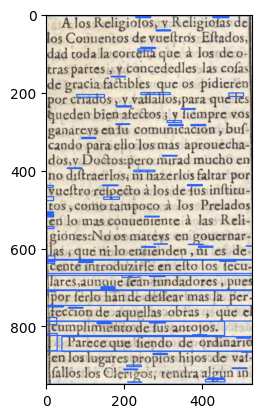

In [11]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)
#Line segmentation
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    
plt.imshow(img2);

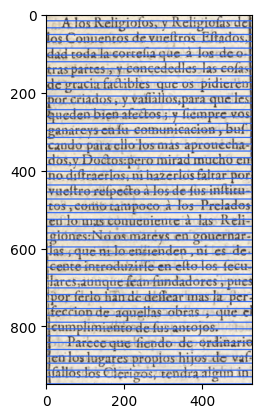

In [12]:
import cv2
import matplotlib.pyplot as plt

# Assuming 'img' is your input image
# Assuming 'dilated' is the dilated version of the image

#(contours, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Calculate average height
average_height = sum([cv2.boundingRect(ctr)[3] for ctr in contours]) / len(contours)

# Line segmentation
img2 = img.copy()

# Create rectangles with equal height covering the entire width
for i, ctr in enumerate(contours):
    x, y, w, h = cv2.boundingRect(ctr)
    y_start = int(i * average_height)
    y_end = int((i + 1) * average_height)
    cv2.rectangle(img2, (0, y_start), (img.shape[1], y_end), (40, 100, 250), 2)

plt.imshow(img2)
plt.show()

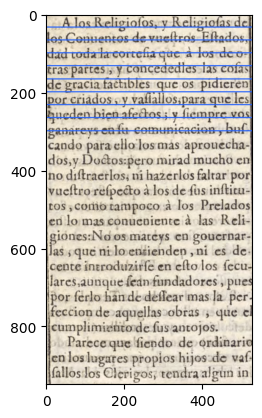

In [13]:
import cv2
import matplotlib.pyplot as plt

# Assuming 'img' is your input image
# Assuming 'dilated' is the dilated version of the image

#(contours, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Filter out contours based on height threshold
filtered_contours = [ctr for ctr in contours if cv2.boundingRect(ctr)[3] > 10 and cv2.boundingRect(ctr)[3] < 50]

# Calculate average height
if filtered_contours:
    average_height = sum([cv2.boundingRect(ctr)[3] for ctr in filtered_contours]) / len(filtered_contours)
else:
    average_height = 0

# Line segmentation
img2 = img.copy()

# Create rectangles with equal height covering the entire width
for i, ctr in enumerate(filtered_contours):
    x, y, w, h = cv2.boundingRect(ctr)
    y_start = int(i * average_height)
    y_end = int((i + 1) * average_height)
    cv2.rectangle(img2, (0, y_start), (img.shape[1], y_end), (40, 100, 250), 2)

plt.imshow(img2)
plt.show()